Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the Dataset

In [46]:
df=pd.read_csv('F:/KAAR TECH/Car_price_prediction/dataset.csv')

In [47]:
print(df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [48]:
df=df.drop(['car_ID'],axis=1)
df

symboling                   CarName fueltype aspiration doornumber  \
0            3        alfa-romero giulia      gas        std        two   
1            3       alfa-romero stelvio      gas        std        two   
2            1  alfa-romero Quadrifoglio      gas        std        two   
3            2               audi 100 ls      gas        std       four   
4            2                audi 100ls      gas        std       four   
..         ...                       ...      ...        ...        ...   
200         -1           volvo 145e (sw)      gas        std       four   
201         -1               volvo 144ea      gas      turbo       four   
202         -1               volvo 244dl      gas        std       four   
203         -1                 volvo 246   diesel      turbo       four   
204         -1               volvo 264gl      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0    convertible        rwd          front       88.6      168.8  ...   
1    convertible        rwd          front       88.6      168.8  ...   
2      hatchback        rwd          front       94.5      171.2  ...   
3          sedan        fwd          front       99.8      176.6  ...   
4          sedan        4wd          front       99.4      176.6  ...   
..           ...        ...            ...        ...        ...  ...   
200        sedan        rwd          front      109.1      188.8  ...   
201        sedan        rwd          front      109.1      188.8  ...   
202        sedan        rwd          front      109.1      188.8  ...   
203        sedan        rwd          front      109.1      188.8  ...   
204        sedan        rwd          front      109.1      188.8  ...   

     enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0           130        mpfi       3.47   2.68              9.0         111   
1           130        mpfi       3.47   2.68              9.0         111   
2           152        mpfi       2.68   3.47              9.0         154   
3           109        mpfi       3.19   3.40             10.0         102   
4           136        mpfi       3.19   3.40              8.0         115   
..          ...         ...        ...    ...              ...         ...   
200         141        mpfi       3.78   3.15              9.5         114   
201         141        mpfi       3.78   3.15              8.7         160   
202         173        mpfi       3.58   2.87              8.8         134   
203         145         idi       3.01   3.40             23.0         106   
204         141        mpfi       3.78   3.15              9.5         114   

    peakrpm  citympg  highwaympg    price  
0      5000       21          27  13495.0  
1      5000       21          27  16500.0  
2      5000       19          26  16500.0  
3      5500       24          30  13950.0  
4      5500       18          22  17450.0  
..      ...      ...         ...      ...  
200    5400       23          28  16845.0  
201    5300       19          25  19045.0  
202    5500       18          23  21485.0  
203    4800       26          27  22470.0  
204    5400       19          25  22625.0  

[205 rows x 25 columns]

Summarize Dataset

In [49]:
print(df.shape)
print(df.head(5))

(205, 25)
   symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68     

Splitting Dataset into X and Y
This X contains both Numerical and Text Data

In [50]:
Xdata=df.drop('price',axis='columns')
numericalCols=Xdata.select_dtypes(exclude=['object']).columns
X=Xdata[numericalCols]
X

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68               9.0         111     5000   
1           130       3.47    2.68               9.0         111     5000   
2           152       2.68    3.47               9.0         154     5000   
3           109       3.19    3.40              10.0         102     5500   
4           136       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200         141       3.78    3.15               9.5         114     5400   
201         141       3.78    3.15               8.7         160     5300   
202         173       3.58    2.87               8.8         134     5500   
203         145       3.01    3.40              23.0         106     4800   
204         141       3.78    3.15               9.5         114     5400   

     citympg  highwaympg  
0         21          27  
1         21          27  
2         19          26  
3         24          30  
4         18          22  
..       ...         ...  
200       23          28  
201       19          25  
202       18          23  
203       26          27  
204       19          25  

[205 rows x 14 columns]

In [51]:
Y=df['price']

In [52]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
Scaling the Independent Variables

In [53]:
from sklearn.preprocessing import scale
cols=X.columns
X=pd.DataFrame(scale(X))
X.columns=cols
X

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1     1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2     0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3     0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4     0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   
..         ...        ...        ...       ...        ...         ...   
200  -1.476452   1.721873   1.198549  1.398245   0.728239    0.763241   
201  -1.476452   1.721873   1.198549  1.351515   0.728239    0.949992   
202  -1.476452   1.721873   1.198549  1.398245   0.728239    0.878757   
203  -1.476452   1.721873   1.198549  1.398245   0.728239    1.273437   
204  -1.476452   1.721873   1.198549  1.398245   0.728239    0.975021   

     enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
0      0.074449   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
1      0.074449   0.519071 -1.839377         -0.288349    0.174483 -0.262960   
2      0.604046  -2.404880  0.685946         -0.288349    1.264536 -0.262960   
3     -0.431076  -0.517266  0.462183         -0.035973   -0.053668  0.787855   
4      0.218885  -0.517266  0.462183         -0.540725    0.275883  0.787855   
..          ...        ...       ...               ...         ...       ...   
200    0.339248   1.666445 -0.336970         -0.162161    0.250533  0.577692   
201    0.339248   1.666445 -0.336970         -0.364062    1.416637  0.367529   
202    1.109571   0.926204 -1.232021         -0.338824    0.757535  0.787855   
203    0.435538  -1.183483  0.462183          3.244916    0.047732 -0.683286   
204    0.339248   1.666445 -0.336970         -0.162161    0.250533  0.577692   

      citympg  highwaympg  
0   -0.646553   -0.546059  
1   -0.646553   -0.546059  
2   -0.953012   -0.691627  
3   -0.186865   -0.109354  
4   -1.106241   -1.273900  
..        ...         ...  
200 -0.340094   -0.400490  
201 -0.953012   -0.837195  
202 -1.106241   -1.128332  
203  0.119594   -0.546059  
204 -0.953012   -0.837195  

[205 rows x 14 columns]

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.20,random_state=0)

Training using Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

Evaluating Model

In [56]:
ypred= model.predict(x_test)

from sklearn.metrics import r2_score
r2score = r2_score(y_test,ypred)
print("R2score",r2score*100)

R2score 90.60039259262717


10295.0


<AxesSubplot:xlabel='price', ylabel='Count'>

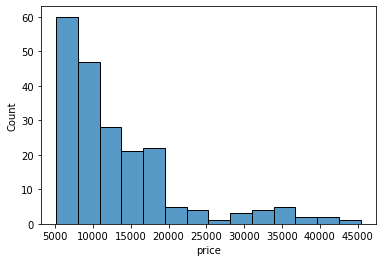

In [58]:
import seaborn as sns
print(df['price'].median())
sns.histplot(x='price',data=df)

<AxesSubplot:xlabel='CarName', ylabel='count'>

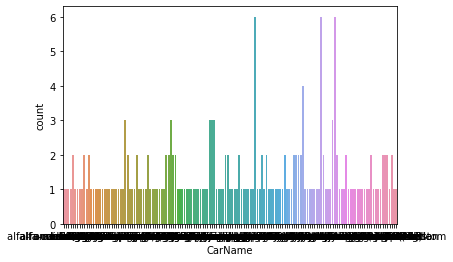

In [59]:
sns.countplot(x='CarName',data=df)

<AxesSubplot:>

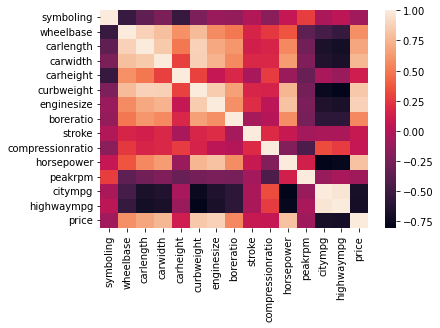

In [60]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix)

<AxesSubplot:>

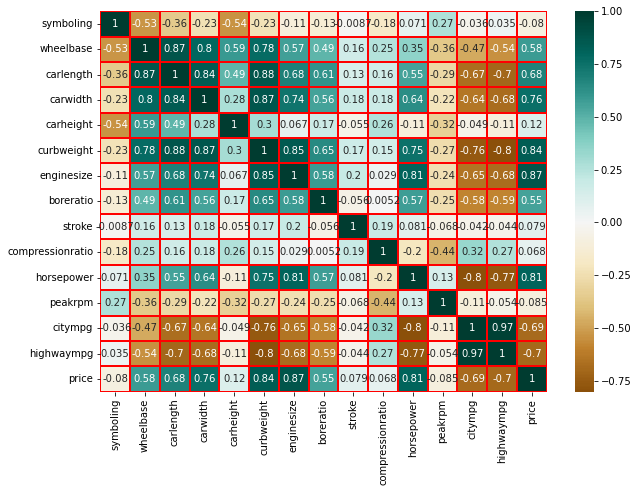

In [61]:
plt.figure(1,figsize=(10,7))
sns.heatmap(corr_matrix,cmap='BrBG',center=0,annot=True,cbar=True,linewidth=1.5,linecolor='red')